# Telling Stories Using Graphs

## Lesson Goals

In this lesson we will go over the types of data comparisons and what visualizations are best suited for each one.

## Introduction

There is an old saying that states, a picture is worth a thousand words. People have been using pictures to tell stories and sell ideas for over a century. As data analysts or data scientists today, we are not limited to conducting analysis on data. We also want to use data to help us tell stories. People who can and have the patience to understand complex data are very few. Therefore, we need to use the "picture" way to tell our stories to people so that they can "see" complex data in the way we expect.

In this lesson we will first review two main principles of good storytelling with data visualization. Then we will examine the different types of relationships between data and the most appropriate choice of chart to visually represent each type of relationship.

## Principles of Good Storytelling

Good storytelling via data visualization has two main principles:

* To make the information we want to convey salient and relevant to the audience.

* To allow the audience to accurately interpret the information we want to convey.

Data visualization is good at extracting relevant information from the real world and presenting a sustained "snapshot" so that the audience can examine in depth over time. However, even in data visualization, the information contained in the charts can still be overwhelming and noisy (i.e. having a lot of irrelevant information to distract the audience from the main point). Techniques must be employed to highlight the main information we want to convey so that the audience can capture it easily.

One example technique to present salient and relevant information is by using the appropriate visual mode (e.g. color, layout, size, perspective, etc.). Consider the following scenario where the audience is expected to "see" how frequent the word data appears in an article. Which of the two presentations allows the audience to capture the information better?

## Using The Appropriate Type of Graph for Storytelling

Next we will go over the graph types we have learned so far and explain when to use each type to present what kind of data relationships. We will use our vehicles dataset to demonstrate these visualizations.

### Scatter Plots

A clear and concise visualization that can be used to determine the existence and type of relationship between two variables is a scatter plot. If we would like to plot 3 variables, we can add additional dimensions to our chart using color or size. However, we should be careful not to overload the chart with information. This will make our chart no longer clear and concise. For more than two variables that we would like to compare pairwise, we may opt to use a scatter matrix instead. A scatter plot can help us detect whether there is a linear relationship between two variables or whether there is a different type of relationship (for example, an exponential or logarithmic relationship). In some cases, we may observe a random distribution of points which means there is no relationship between the two variables. Scatter plots are also useful in identifying outliers and certain aspects underlying in the distribution of our data.

The following scenarios are presented as examples for you to decide which type of scatter plot should be used in different situations.

#### Scenario 1: Two Variables

We have two variables `City MPG` and `Highway MPG` which are linearly correlated. In this scenario, a single-color two-dimensional scatter plot is adequate to represent the linear relationship of the variables:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


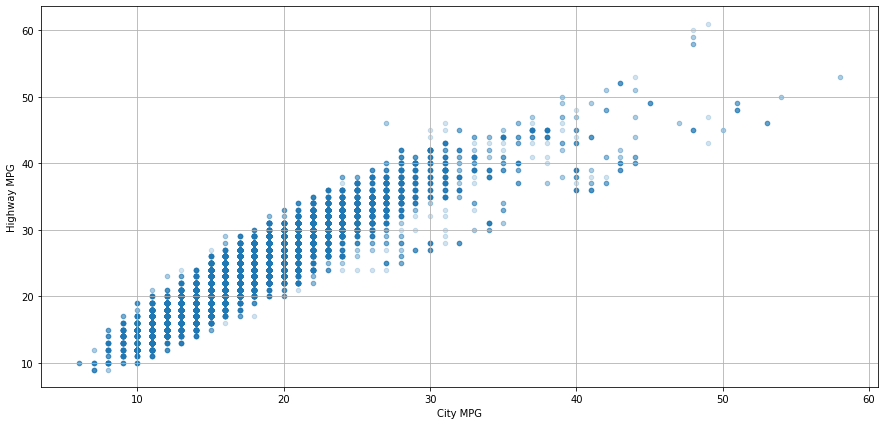

In [3]:
vehicles.plot.scatter(x="City MPG", y="Highway MPG", alpha=0.2, grid=True, figsize=(15,7))
plt.show()

#### Scenario 2: Three Variables

In addition to `City MPG` and `Highway MPG`, now we have a third variable: `CO2 Emission Grams/Mile`. How to visualize the third dimension in a 2-dimensional scatter plot? The answer is to use point color or size.

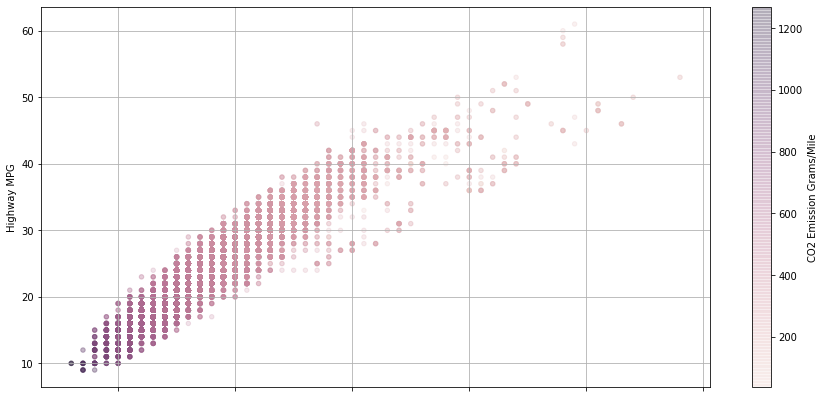

In [4]:
cmap = sns.cubehelix_palette(as_cmap=True)

vehicles.plot.scatter(
    x="City MPG", y="Highway MPG", c="CO2 Emission Grams/Mile", 
    cmap=cmap, alpha=0.2, grid=True, figsize=(15,7)
)

plt.show()

#### Scenario 3: More Than Three Variables

But the vehicles dataset has 9 numeric variables. How do we visualize 9 variables in a 2-dimensional scatter plot? Well, a single scatter plot obviously does not meet our needs. We can use a scatter plot matrix to visualize the pair-wise relationships of those variables.

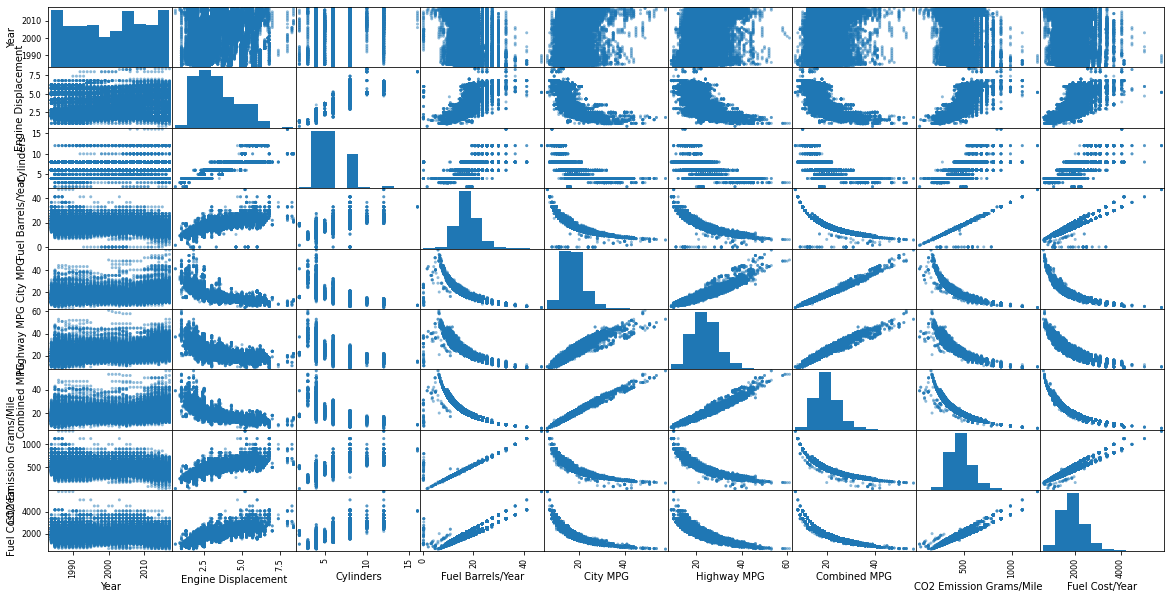

In [5]:
pd.plotting.scatter_matrix(vehicles, figsize=(20,10))
plt.show()

In the matrix above, the sub-plots in the diagonal can be ignored because they are each variable's relationship to itself. In other sub-plots, you can roughly tell some variables have linear relationships (e.g. Fuel Barrels/Year vs CO2 Emission Grams/Mile), curvilinear relationships (e.g. Fuel Barrels/Year vs Combined MPG), and no relationship (e.g. Year vs all others).

### Line Charts

Line charts are similar to scatter plots. There are different ways to connect the points in a line chart. While we can simply connect the lines without looking for a trend, we can also create a linear trend or or use other methods like spline interpolation.

Using a line chart makes it easier to plot more than one variable at once using the same x and y axis. To do this, we must reshape the data first using the melt function.

The melt function will create a dataset that has all MPG values in one column and another column will indicate what type of MPG this is. We then use this indicator column for plotting the color.

In [6]:
m = pd.melt(vehicles[['City MPG', 'Highway MPG', 'CO2 Emission Grams/Mile']], id_vars='CO2 Emission Grams/Mile', var_name='MPG')
m.head()

,CO2 Emission Grams/Mile,MPG,value
0,522.764706,City MPG,18
1,683.615385,City MPG,13
2,555.437500,City MPG,16
3,683.615385,City MPG,13
4,555.437500,City MPG,14


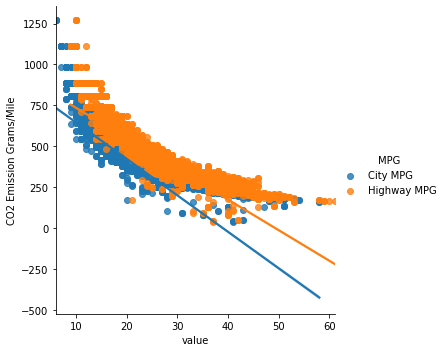

In [7]:
sns.lmplot(x='value',y='CO2 Emission Grams/Mile', hue='MPG', data=m,fit_reg=True) 
plt.show()

### Histograms

Histograms are typically used to illustrate the distribution of the data. Similar to scatter plots, histograms can also help us to identify outliers. Histograms can also show us whether there is a general trend of skewness or symmetry in the data. Histograms are a good choice for examining the distribution of one variable at a time. With a careful selection of bins, we can also identify whether the data has a single mode or whether it is bimodal or multimodal.

Recall that the default number of bins is 10.

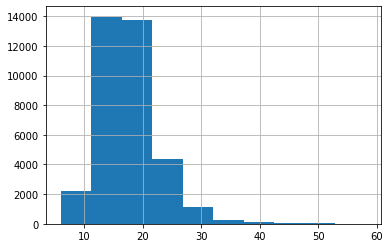

In [8]:
vehicles['City MPG'].hist()
plt.show()

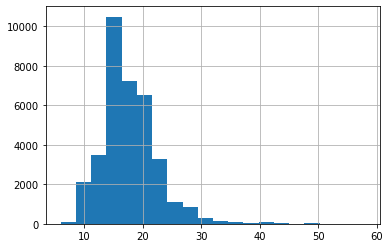

In [9]:
vehicles['City MPG'].hist(bins=20)
plt.show()

### Bar Charts

Bar charts can be used to compare within categorical variables. We can use these charts for comparison between time periods (for example, this year vs. last year) or between two subgroups in the population (like males and females). In this example we are comparing two variables that describe a vehicle's MPG.

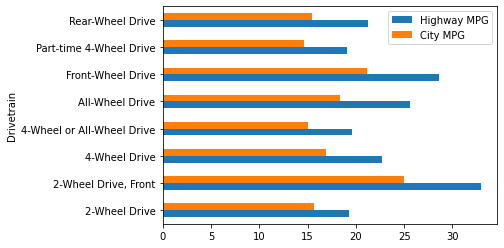

In [10]:
vehicles_mean = vehicles[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean")
vehicles_mean.plot.barh()
plt.show()

### Pie Charts

Many experts in the field of data visualization recommend not using pie charts. Pie charts are intended to demonstrate the proportionate difference between the different groups in a categorical variable. However, looking at the different groups as a fraction of a whole means a loss of information about the original data. There are always better suited visualizations than pie charts. The most obvious alternative is a bar chart.